In [4]:
from lib import transient
from imp import reload
# reload(transient)

import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

import pandas as pd

True
Imported 11 scan(s) as pump_power dependence


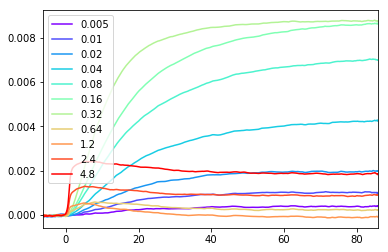

In [20]:
filepath = 'E:/data/RuCl3/mat/kerr_rotation/fluence_3.8K/'
files = os.listdir(filepath)

cutFreq = 0.01 # THz
t0 = 85
key_parameter = 'pump_power'
description = ''

usebg = False
trs = []
k_parameters = []
data = {}


if 'background.mat' in files:
    bg_trace = transient.Transient()
    bg_trace.import_file(filepath + 'background.mat', 
                           cleanData=False, 
                           key_parameter=key_parameter,description=description)
    files.remove('background.mat')
    bg_trace.crop_time_scale()
    bg_trace.shift_time(t0)
    bg_trace.filter_low_pass(cutFreq)
#     tr.flip_trace()
    bg_trace.remove_DC_offset()
    bg_trace.flip_time()
    usebg = True
    print(usebg)
    
for file in files:
    try:

        tr = transient.Transient()
        tr.import_file(filepath + file, 
                           cleanData=False, 
                           key_parameter=key_parameter,description=description)


        tr.crop_time_scale()
        tr.shift_time(t0)
        tr.filter_low_pass(cutFreq)
    #     tr.flip_trace()
        tr.remove_DC_offset()
        tr.flip_time()
        if usebg:
            tr.trace = tr.trace - bg_trace.trace
        
        data[getattr(tr,key_parameter)] = tr.trace
        
        
        k_parameters.append(float(getattr(tr,key_parameter)))
    
#        tr.trace = np.divide(tr.trace,max(tr.trace))
    #     tr.trace = np.divide(tr.trace,tr.pump_power)
    
        trs.append(tr)
    except Exception as exc:
        print('skipped file: {0}\nerror: {1}'.format(file,exc))
data = pd.DataFrame(data,index=tr.time)
print('Imported {0} scan(s) as {1} dependence'.format(len(trs),trs[0].key_parameter))
data.plot(colormap='rainbow')


In [28]:
savepath = 'E:/data/RuCl3/HDF5/'
name = 'kerr_4K_fluence_dependence'
data.to_hdf(savepath + name + '.hdf5', name, mode="w")

In [29]:
data1 = pd.DataFrame()

In [32]:
data1 = pd.read_hdf(savepath + name + '.hdf5')

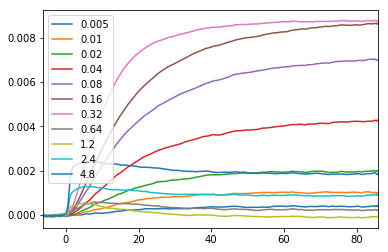

In [33]:
data1.plot()